<a href="https://colab.research.google.com/github/waqasahmad-developer/Logistic_Regression/blob/main/Perceptron_Sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
X,y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, random_state=41, n_classes= 2, n_clusters_per_class=1, hypercube=False, class_sep=20)

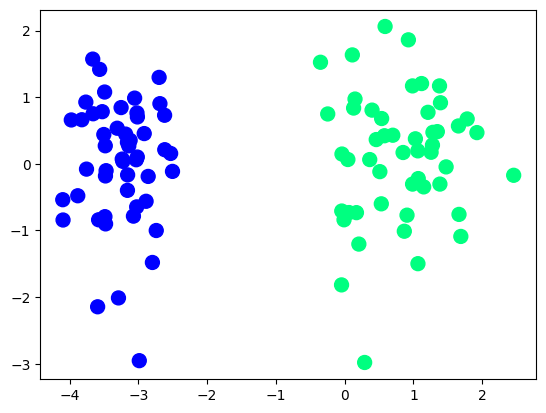

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y, cmap='winter',s=100)

# Using perceptron trick with step function

In [ ]:
def perceptron(X,y):

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.1

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j], weights))
    weights = weights + lr*(y[j] - y_hat) * X[j]

  return weights[0], weights[1:]

In [ ]:
def step(z):
  return 1 if z>0 else 0

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
print(intercept_)
print(coef_)

1.2000000000000002
[1.0580085  0.40381514]


In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

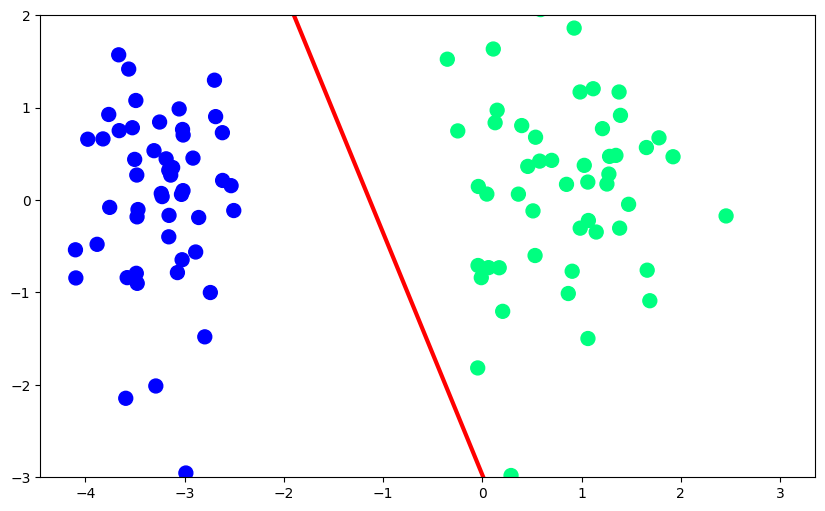

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [ ]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [ ]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

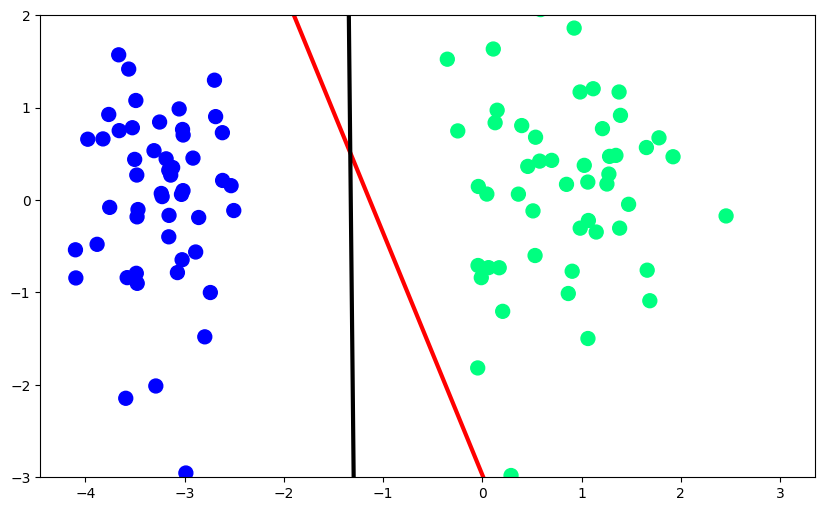

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Using perceptron trick with Sigmoid Function

In [ ]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

In [ ]:
intercept_,coef_ = perceptron(X,y)

In [ ]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [ ]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

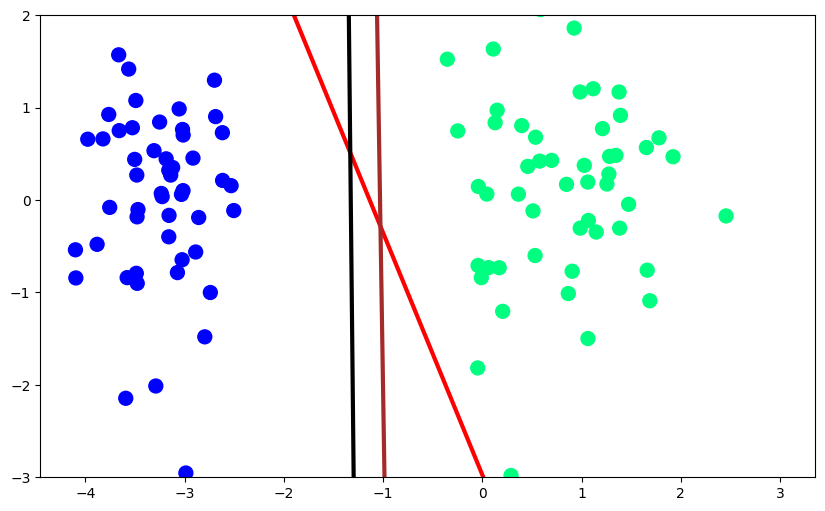

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)     # the red line is from using perceptron trick with step function
plt.plot(x_input1,y_input1,color='black',linewidth=3) # the black line is from using logistic regression
plt.plot(x_input2,y_input2,color='brown',linewidth=3) # the brown line is from using perceptron trick with sigmoid function
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib.pyplot as plt

def perceptron_sigmoid_animation(X, y, lr=0.1, epochs=1000):
    X_bias = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X_bias.shape[1])

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)
    ax.set_ylim(-3, 2)
    line, = ax.plot([], [], color='brown', linewidth=3)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        nonlocal weights
        j = np.random.randint(0, X_bias.shape[0])
        y_hat = sigmoid(np.dot(X_bias[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X_bias[j]

        intercept_ = weights[0]
        coef_ = weights[1:]
        if coef_[1] != 0: # Avoid division by zero
            m = -(coef_[0] / coef_[1])
            b = -(intercept_ / coef_[1])
            x_input = np.linspace(-3, 3, 100)
            y_input = m * x_input + b
            line.set_data(x_input, y_input)
        else:
             line.set_data([], []) # Clear the line if the slope is undefined
        return line,

    ani = FuncAnimation(fig, update, frames=epochs, init_func=init, blit=True, interval=20)
    plt.close(fig) # Prevent the initial plot from being displayed
    return HTML(ani.to_jshtml())
# Increase the animation embed limit to 200MB
plt.rcParams['animation.embed_limit'] = 200
perceptron_sigmoid_animation(X, y)
